In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/data/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 848 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 211 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.InputLayer(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 487ms/step - accuracy: 0.6339 - loss: 0.7700 - val_accuracy: 0.7062 - val_loss: 0.5155
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 418ms/step - accuracy: 0.7280 - loss: 0.4538 - val_accuracy: 0.8578 - val_loss: 0.3727
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 364ms/step - accuracy: 0.8234 - loss: 0.3750 - val_accuracy: 0.8720 - val_loss: 0.3112
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 382ms/step - accuracy: 0.8414 - loss: 0.3555 - val_accuracy: 0.7204 - val_loss: 0.5964
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 377ms/step - accuracy: 0.7963 - loss: 0.4714 - val_accuracy: 0.8768 - val_loss: 0.3089
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.8696 - loss: 0.3172 - val_accuracy: 0.9005 - val_loss: 0.3084
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.8728 - loss: 0.3195 - val_accuracy: 0.9194 - val_loss: 0.2307
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - accuracy: 0.8472 - loss: 0.3138 - val_accu

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy*100}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.9073 - loss: 0.1888
Validation Loss: 0.1753074675798416
Validation Accuracy: 92.8909957408905


In [ ]:
def display_predictions(model, generator):
    images, labels = next(generator)
    predictions = (model.predict(images) > 0.5).astype("int32")

    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = 'clean' if labels[i] == 0 else 'dirty'
        predicted_label = 'clean' if predictions[i] == 0 else 'dirty'
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


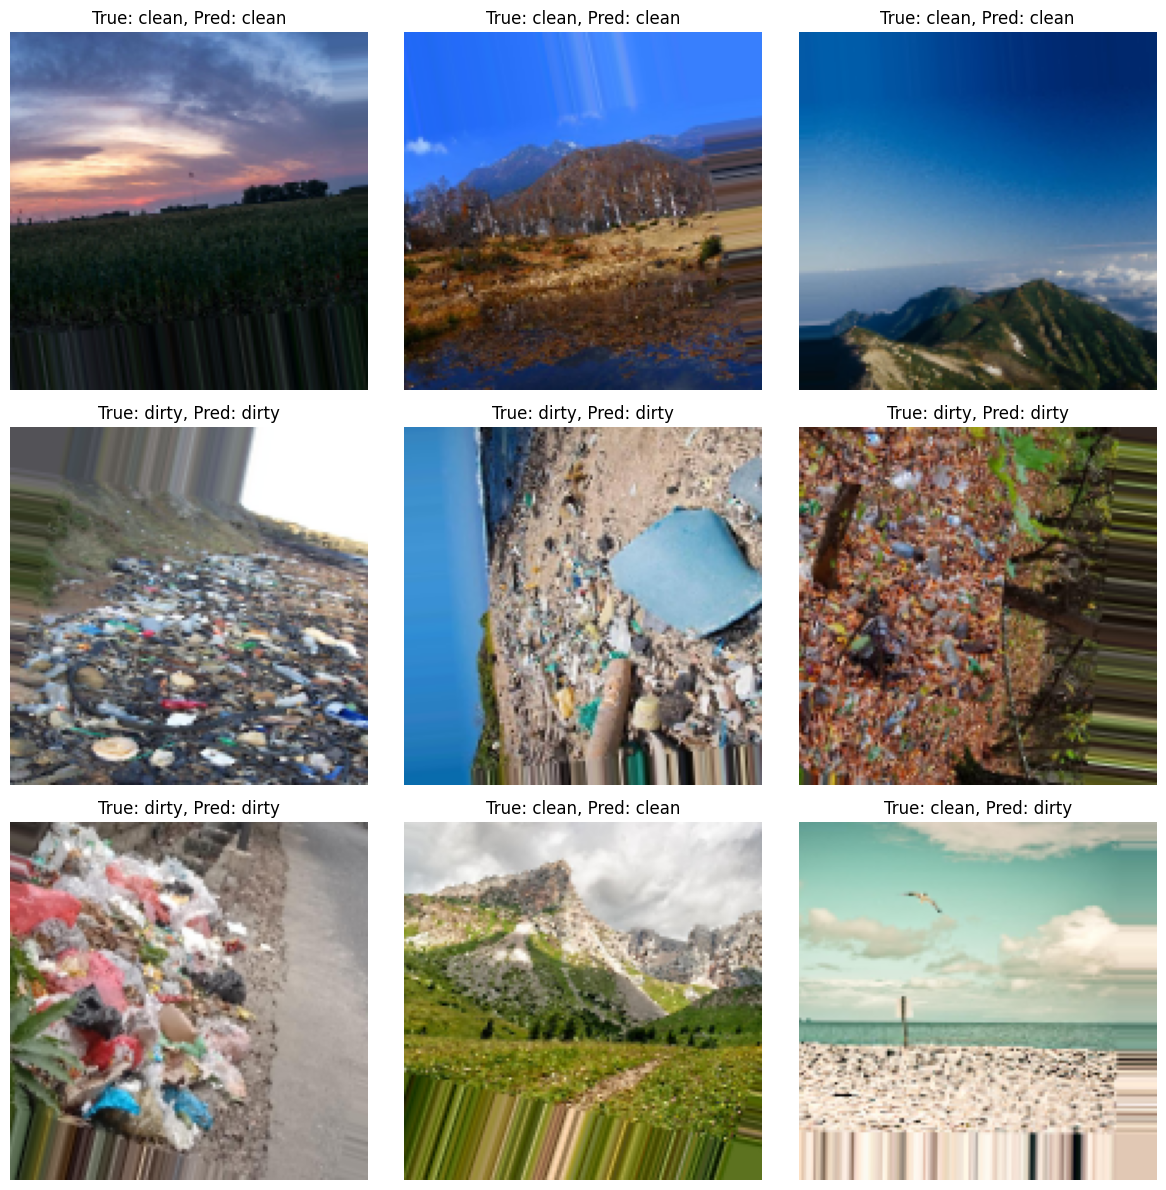

In [ ]:
display_predictions(model, validation_generator)

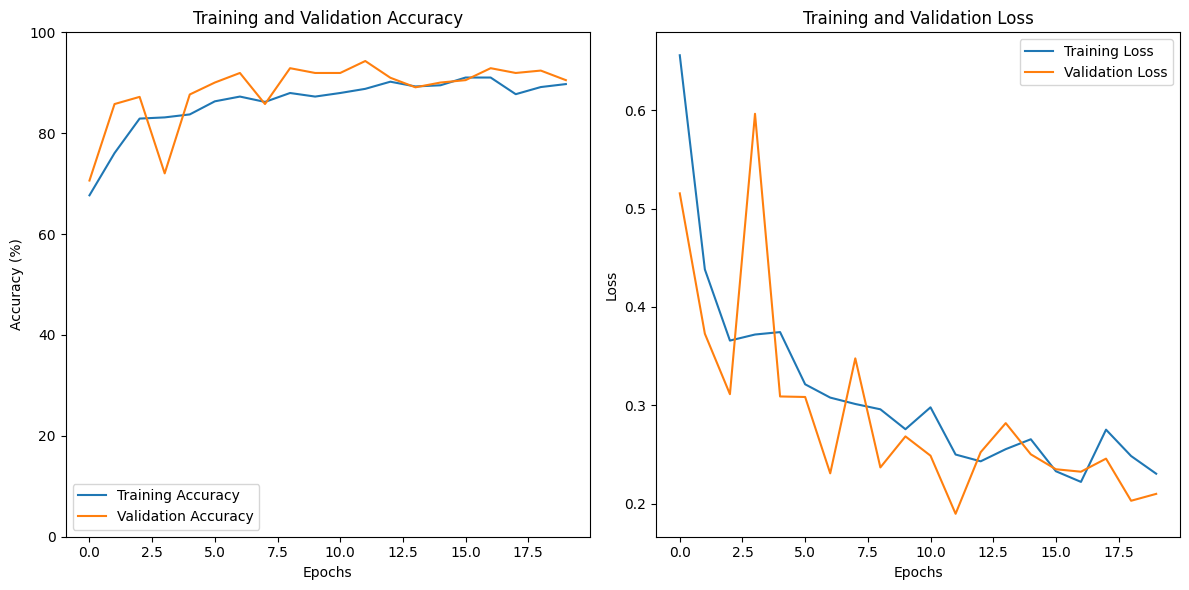

In [ ]:

def plot_history(history):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot([x * 100 for x in history.history['accuracy']], label='Training Accuracy')
    plt.plot([x * 100 for x in history.history['val_accuracy']], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


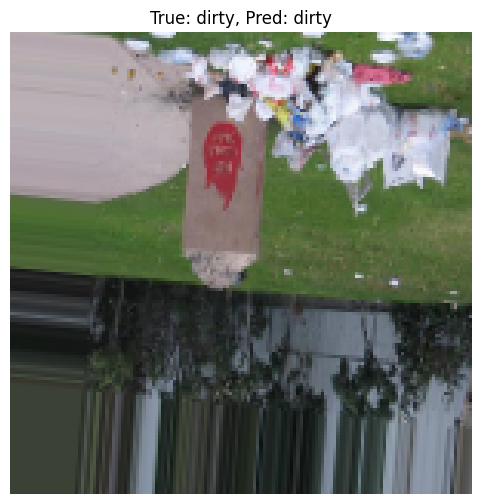

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


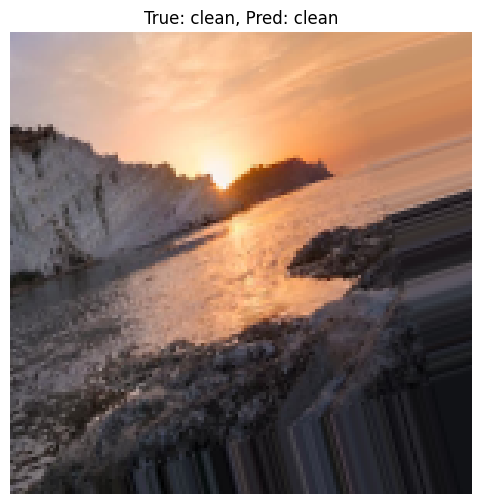

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


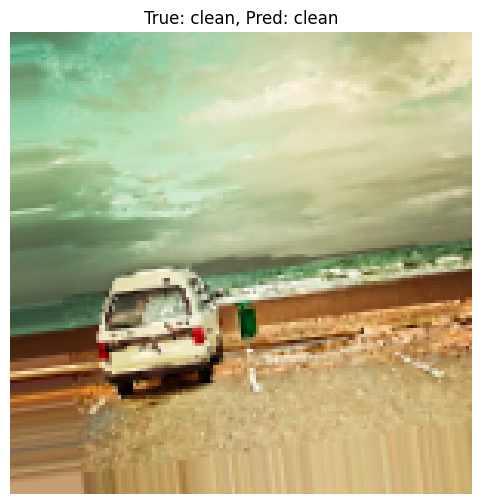

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


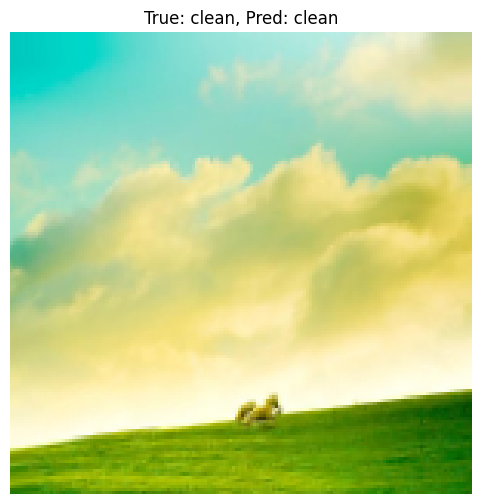

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


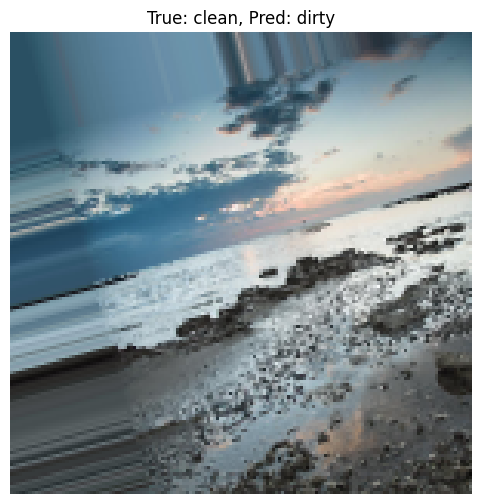

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


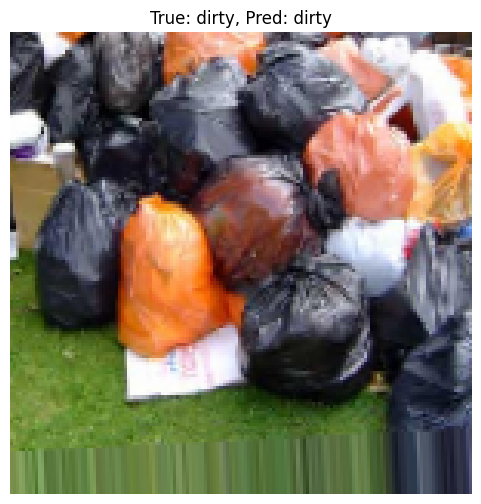

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


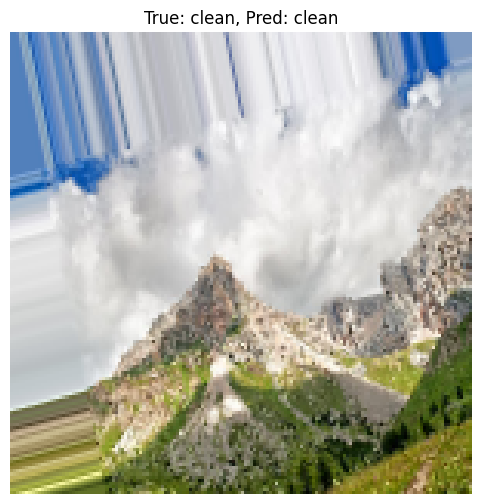

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


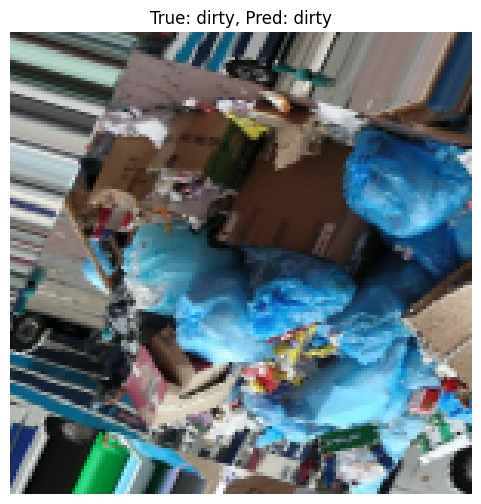

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


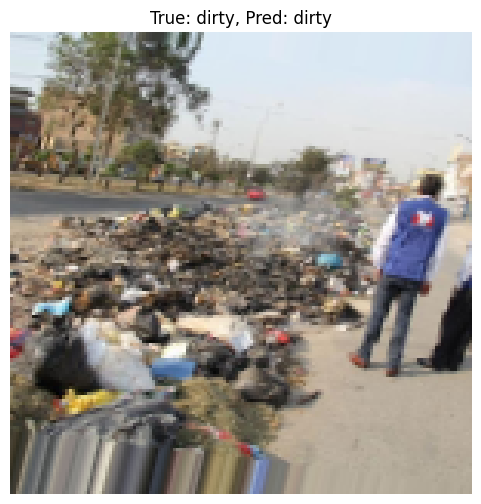

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


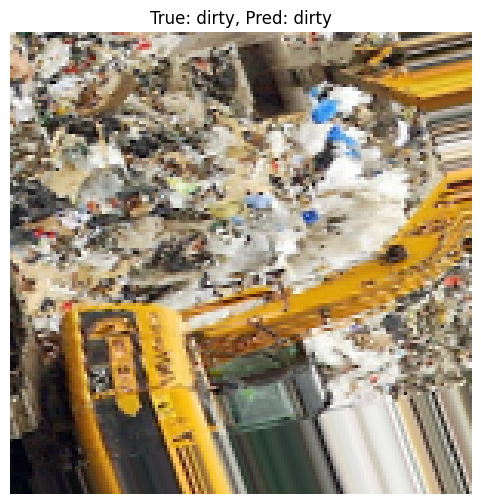

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


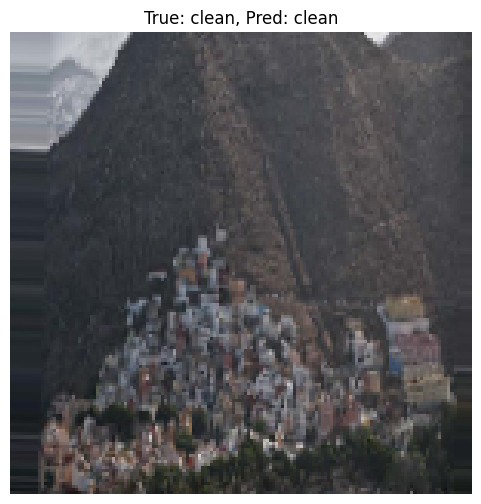

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


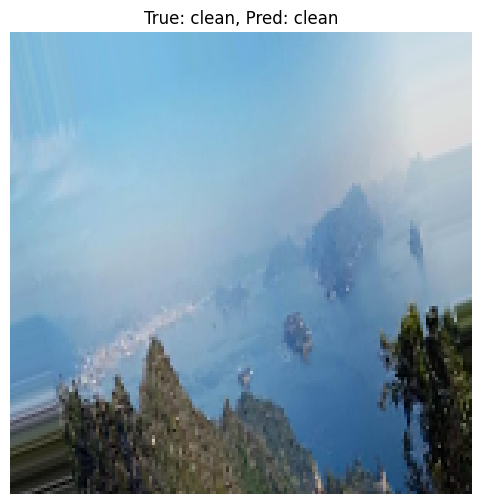

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


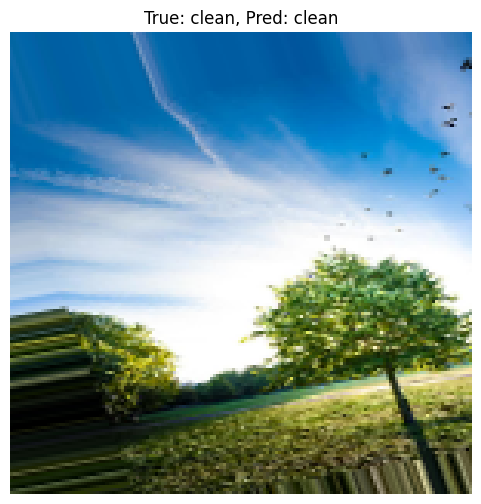

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


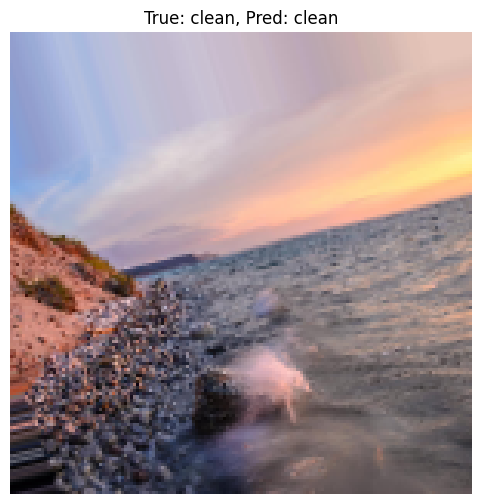

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


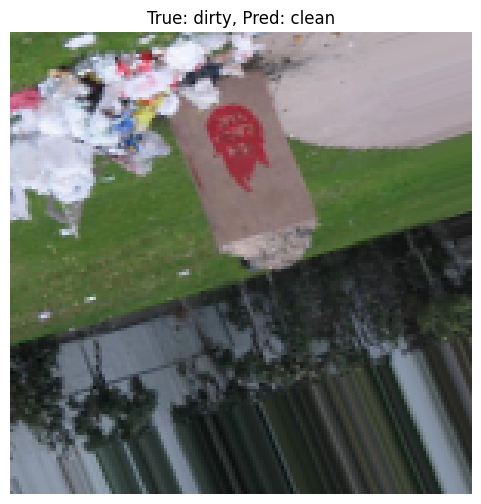

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


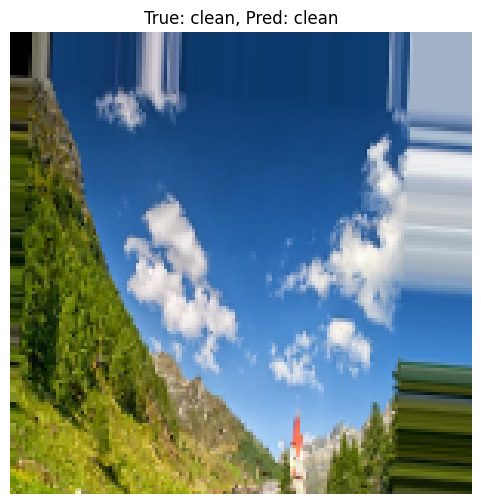

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


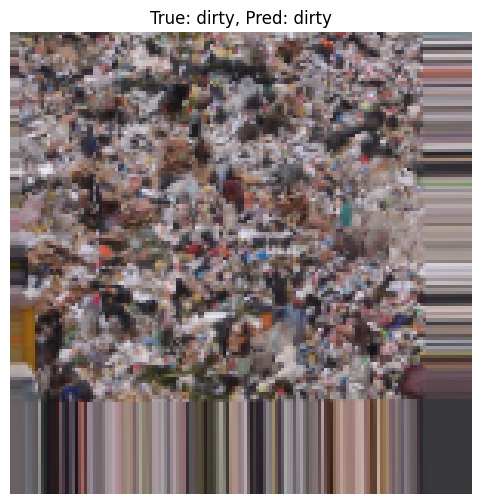

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


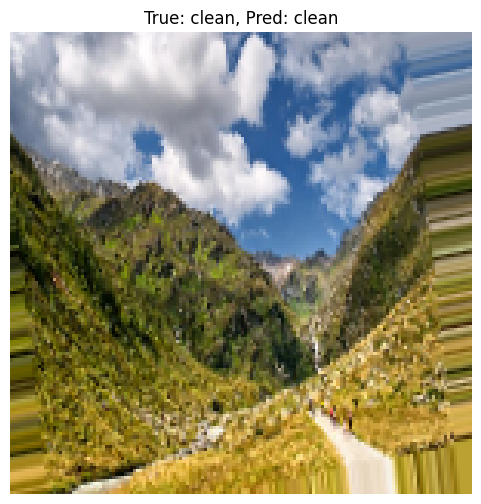

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


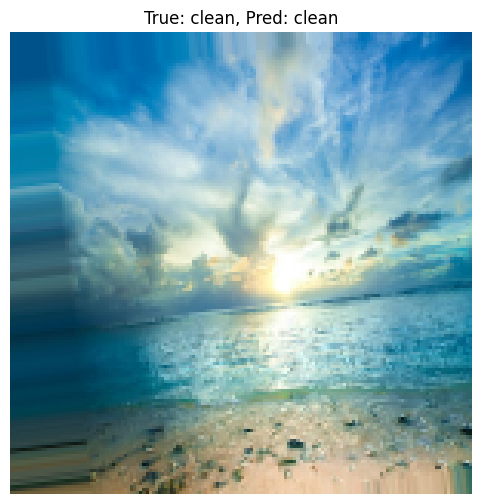

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


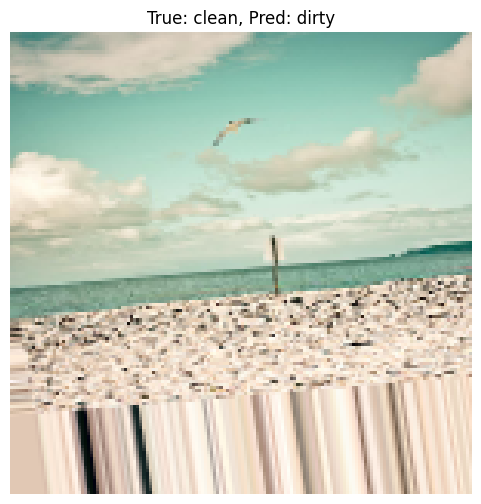

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


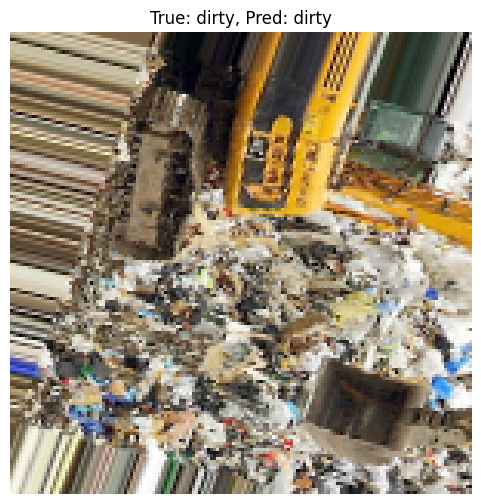

In [ ]:
def show_continuous_predictions(model, generator):

    for i, (images, labels) in enumerate(generator):
        predictions = (model.predict(images) > 0.5).astype("int32")


        plt.figure(figsize=(6, 6))
        plt.imshow(images[0])
        true_label = 'clean' if labels[0] == 0 else 'dirty'
        predicted_label = 'clean' if predictions[0] == 0 else 'dirty'

        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis('off')
        plt.show()


        if i >= 20:
            break

show_continuous_predictions(model, validation_generator)